## **1- Loading the dataset + libraries**

In [2]:
import os
from PIL import Image
# import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="G5NOgWpGeRvNrfA8BZJS")
project = rf.workspace("hehe-ngdal").project("orchid-leaf-spots-blujx")
version = project.version(11)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [3]:
path= 'Orchid-leaf-spots-11'

In [4]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

train: ../../Orchid-leaf-spots-11/train/images
val: ../../Orchid-leaf-spots-11/valid/images
test: ../../Orchid-leaf-spots-11/test/images

nc: 3
names: ['burn', 'rot', 'spot']

roboflow:
  workspace: hehe-ngdal
  project: orchid-leaf-spots-blujx
  version: 11
  license: CC BY 4.0
  url: https://universe.roboflow.com/hehe-ngdal/orchid-leaf-spots-blujx/dataset/11


## **2- Image Preprocessing**

1- remove unvalid images

In [6]:
bad_files = []  # List to store paths of bad files

# Folders to check
splits = ["train", "valid", "test"]

for split in splits:
    images_folder = os.path.join(path, split, "images")

    for file in os.listdir(images_folder):
        file_path = os.path.join(images_folder, file)

        try:
            # Open image to check validity
            with Image.open(file_path) as img:
                img.verify()  # Verifies the image integrity without fully loading it

        except Exception as e:
            # If an error occurs (corrupted image), add to bad_files and remove it
            bad_files.append(file_path)
            print(f"Removing corrupted file: {file_path}")
            os.remove(file_path)

print(f"Removed {len(bad_files)} corrupted images.")


Removed 0 corrupted images.


## **3.1- Training a YOLOv8 Model**


In [7]:
# Install Ultralytics library which has Yolo
!pip install -q ultralytics

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

In [3]:
import torch
print(torch.cuda.is_available())         # Should be True
print(torch.cuda.get_device_name(0))     # Should print your GPU name


True
NVIDIA GeForce GTX 1650 Ti with Max-Q Design


Note: The YOLOv8 image size is 640. We can change it, but this is the best size. Additionally, we didn't assign the model to a variable because we are training an existing model and don't want to overwrite it.

##### trial 1

YOLOv8 does the augmentations by itself.

In [10]:
# Train on the dataset
model.train(data=dataset_path, epochs=100, imgsz=640)

Ultralytics 8.3.121  Python-3.9.21 torch-2.2.2 CUDA:0 (NVIDIA GeForce GTX 1650 Ti with Max-Q Design, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=Orchid-leaf-spots-11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

c:\Users\Zahra\miniconda3\envs\deep_learning\lib\site-packages\torch\nn\modules\module.py:1150: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\cb\pytorch_1000000000000\work\c10/cuda/CUDAAllocatorConfig.h:30.)
  return t.to(device, dtype if t.is_floating_point() or t.is_complex() else None, non_blocking)
train: Scanning C:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\Orchid-leaf-spots-11\train\labels.cache... 1551 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1551/1551 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1222, len(boxes) = 14461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.30.2 ms, read: 85.422.8 MB/s, size: 69.4 KB)


val: Scanning C:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\Orchid-leaf-spots-11\valid\labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.09G      2.536      3.512      1.985        260        640:  22%|██▏       | 21/97 [04:31<16:21, 12.92s/it]


KeyboardInterrupt: 

evaluate

In [13]:
metrics = model.val(data=dataset_path)

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1598.8±434.6 MB/s, size: 68.3 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]


                   all        205       2749      0.253      0.251       0.23      0.113
                  burn          6          9    0.00807      0.111      0.119      0.104
                   rot        103        513      0.472      0.374      0.401      0.183
                  spot        139       2227      0.278      0.266      0.171     0.0511
Speed: 2.2ms preprocess, 10.9ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2


test:

In [14]:
model = YOLO(model.trainer.best)  # Use the best weights



image 1/1 /content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg: 640x640 1 rot, 2 spots, 35.0ms
Speed: 16.0ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


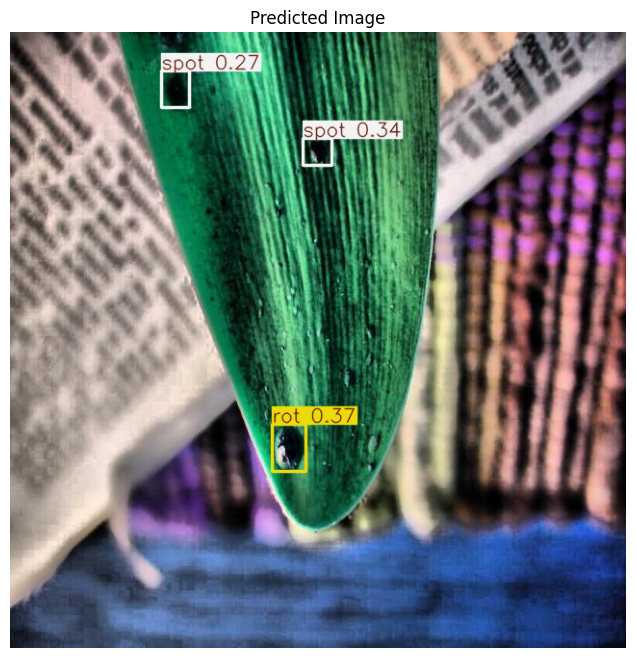

In [15]:
results = model("/content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/images/IMG_0019_jpg.rf.0ebc9afe8744c745acf7944305c885d8.jpg: 640x640 5 rots, 1 spot, 16.3ms
Speed: 2.0ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


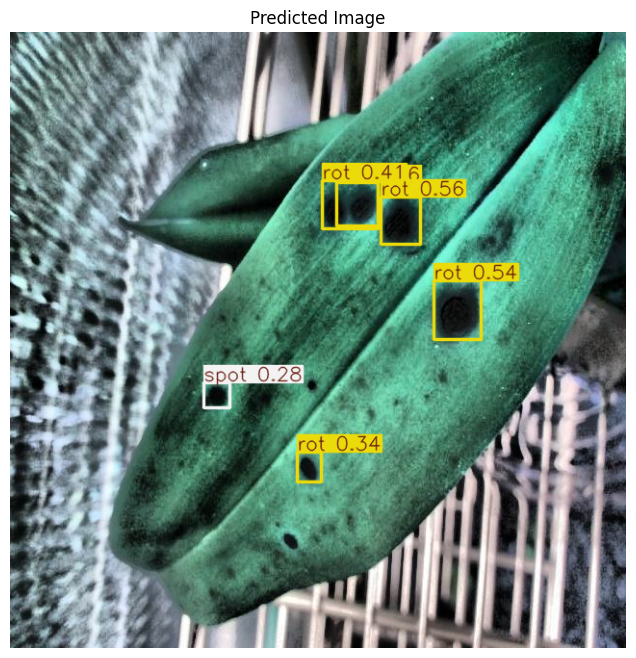

In [16]:
results = model("/content/Orchid-leaf-spots-11/test/images/IMG_0019_jpg.rf.0ebc9afe8744c745acf7944305c885d8.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg: 640x640 1 rot, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


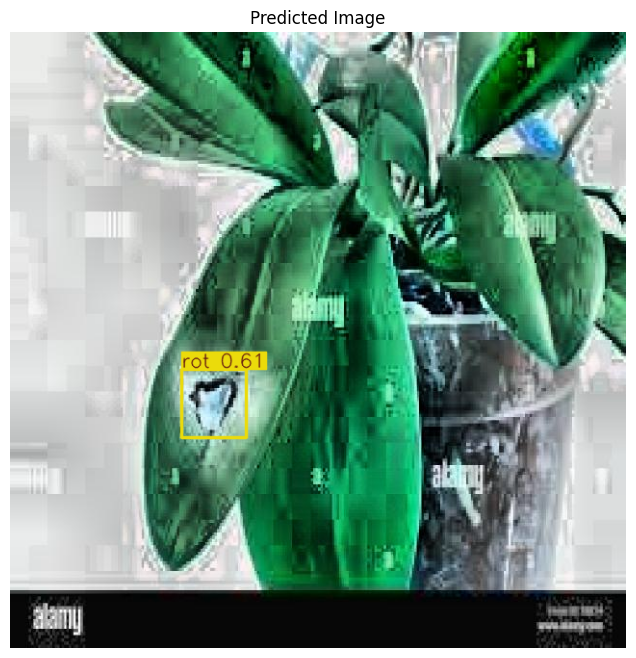

In [18]:
results = model("/content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()

Saving the model

In [17]:
from ultralytics import YOLO

# Save full model including architecture, weights, metadata
model.save("yolov8s_custom.pt")

loaded_model = YOLO("yolov8s_Custom.pt")

NameError: name 'model' is not defined

Testing on unseen data

In [ ]:
from ultralytics import YOLO

loaded_model = YOLO("yolov8s_Custom.pt")


image 1/1 c:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\spot1.jpg: 480x640 93 spots, 164.6ms
Speed: 9.6ms preprocess, 164.6ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict4


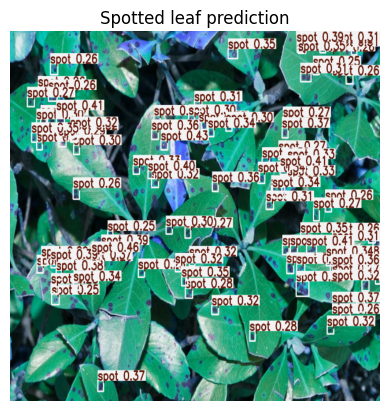

In [13]:
import matplotlib.pyplot as plt
import cv2
result_spot = loaded_model("spot1.jpg", save=True)

# Convert result to a NumPy array and display
predicted_spot = result_spot[0].plot()  # Convert prediction to an image
predicted_spot = cv2.resize(predicted_spot, (640, 640))

# plt.figure(figsize=(8, 8))
plt.imshow(predicted_spot)
plt.axis("off")
plt.title("Spotted leaf prediction")
plt.show()


image 1/1 c:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\rot1.jpg: 352x640 19 spots, 135.4ms
Speed: 3.7ms preprocess, 135.4ms inference, 4.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs\detect\predict4


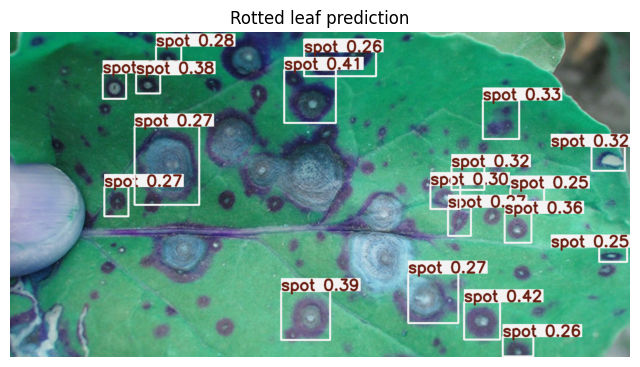

In [14]:
result_rot = loaded_model("rot1.jpg", save=True)

# Convert result to a NumPy array and display
predicted_rot = result_rot[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_rot)
plt.axis("off")
plt.title("Rotted leaf prediction")
plt.show()




image 1/1 c:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\burn1.jpg: 640x480 (no detections), 175.1ms
Speed: 5.4ms preprocess, 175.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict4


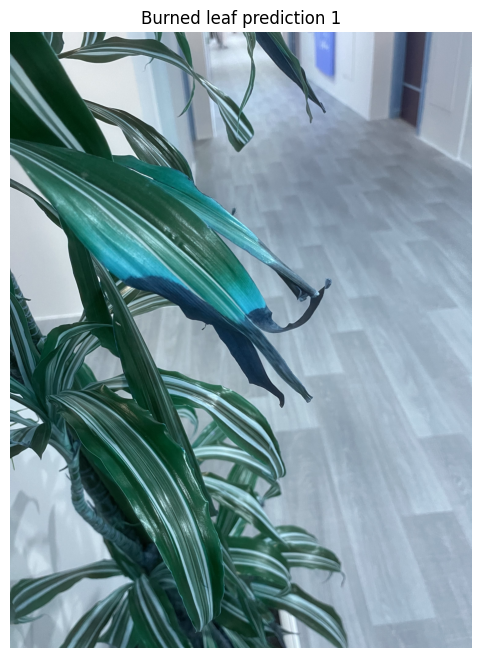

In [15]:
result_burn1 = loaded_model("burn1.jpg", save=True)

# Convert result to a NumPy array and display
predicted_burn1 = result_burn1[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_burn1)
plt.axis("off")
plt.title("Burned leaf prediction 1")
plt.show()



image 1/1 c:\Users\Zahra\Desktop\Cmmn_Place\Projects\TWQ_AI\CV\computer-vision-week-project-gharsa\burn2.jpg: 640x480 2 burns, 169.0ms
Speed: 8.3ms preprocess, 169.0ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict4


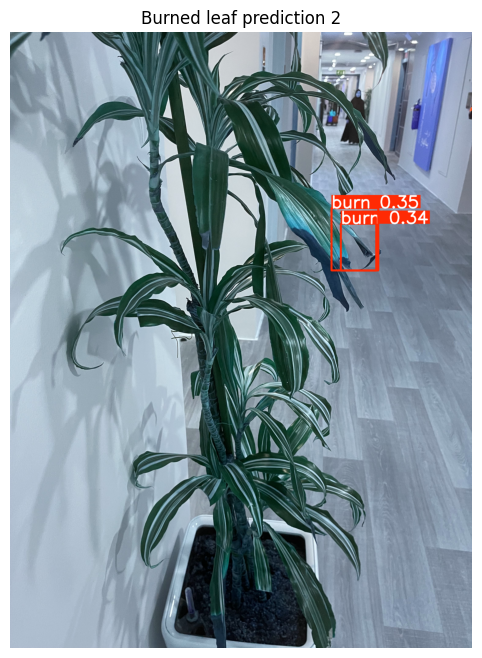

In [16]:
result_burn2 = loaded_model("burn2.jpg", save=True)

# Convert result to a NumPy array and display
predicted_burn2 = result_burn2[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_burn2)
plt.axis("off")
plt.title("Burned leaf prediction 2")
plt.show()
